In [1]:
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# === 修改为你自己的 HDF5 文件路径 ===
filename = './res/step100AMRmesh.h5'

# === 打开 HDF5 文件并读取必要字段 ===
with h5py.File(filename, 'r') as f:
    X = f['X'][1:10]
    Y = f['Y'][1:10]
    Dx = f['Dx'][1:10]
    Dy = f['Dy'][1:10]
    Level = f['Level'][1:10]

In [3]:
# Reopen the HDF5 file to access its datasets
with h5py.File(filename, 'r') as f:
	print(len(f["X"]))

3750


KeyboardInterrupt: 

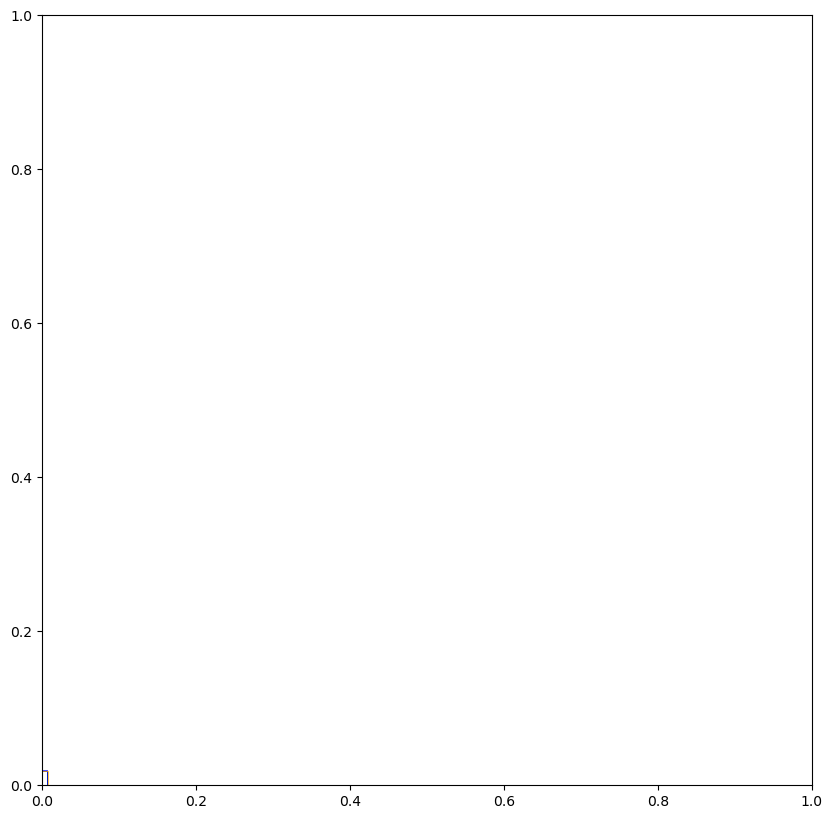

In [2]:
# === 构造颜色列表，用不同颜色标识不同层级 ===
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'gray']
max_level = int(Level.max())

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')

# === 遍历每个 Cell 并绘制矩形 ===
for x, y, dx, dy, level in zip(X, Y, Dx, Dy, Level):
    color = colors[level % len(colors)]
    rect = patches.Rectangle(
        (x - dx / 2, y - dy / 2),  # 左下角
        dx, dy,
        linewidth=0.5,
        edgecolor=color,
        facecolor='none'
    )
    ax.add_patch(rect)

# === 添加图例和注释 ===
legend_elements = [patches.Patch(edgecolor=colors[i % len(colors)], facecolor='none', label=f'Level {i}') 
                   for i in range(max_level + 1)]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_title('AMR Grid Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.grid(True)
plt.show()